In [1]:
import math
import geopandas as gpd

from obia.handlers.geotif import open_geotiff, open_binary_geotiff_as_mask
from obia.segmentation.segment_boundaries import create_segments
from obia.segmentation.segment_statistics import create_objects
from obia.classification.classify import classify
from obia.utils.tiling import create_tiled_segments

/Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
image_path = '/Users/iosefa/puu9band_2021.tif'
mask_path = '/Users/iosefa/puu2mask_2021.tif'   

# segments_path="/Users/iosefa/tiles_2021/segments.gpkg"
# training_segments="/Users/iosefa/training_segments.gpkg"
class_regions="/Users/iosefa/combined_classes.gpkg"

image = open_geotiff(image_path)
mask, _ = open_binary_geotiff_as_mask(mask_path)

# segments = gpd.read_file(segments_path)
# training = gpd.read_file(training_segments)
regions = gpd.read_file(class_regions)

In [8]:
# # objects = create_objects(segments, image, statistics_bands=[5, 4, 2], calc_mean=True, calc_variance=True, calc_max=True,
# #                          calc_contrast=True, calc_dissimilarity=True, calc_correlation=True)

# objects = create_objects(
#     segments, image, statistics_bands=None, 
#     calc_mean=True, calc_variance=True, calc_max=True, calc_skewness=True, calc_kurtosis=True, 
#     calc_contrast=True, calc_dissimilarity=True, calc_homogeneity=True, calc_ASM=True, calc_energy=True, calc_correlation=True
# )

In [ ]:
# objects.to_file("/Users/iosefa/tiles/segment_stats.gpkg")
# objects.to_file("/Users/iosefa/segment_optical_stats_2021.gpkg")

In [2]:
objects = gpd.read_file("/Users/iosefa/segment_optical_stats_2021.gpkg")
# print(training.columns.values)
# print(objects1.columns.values)

In [21]:
structure = gpd.read_file("/Users/iosefa/structure_stats.gpkg")

In [9]:
from obia.utils.utils import label_segments

training_points = gpd.read_file("/Users/iosefa/training_points.gpkg")

training, mixed = label_segments(objects, training_points)

# training.to_file("/Users/iosefa/training_optical_2021.gpkg")

print(len(mixed))

19


In [22]:
training_structure, mixed_structure = label_segments(structure, training_points)

# training.to_file("/Users/iosefa/training_optical_2021.gpkg")

print(len(mixed_structure))

8


In [23]:
training_structure.columns.values



array(['segment_id', 'fhd', 'mean_intensity', 'variance_intensity',
       'total_points', 'geometry', 'feature_class'], dtype=object)

In [71]:
band_labels_spectral = {
    "b0_mean": "Coastal Blue (mean)",
    "b0_variance": "Coastal Blue (variance)",
    "b0_skewness": "Coastal Blue (skewness)",
    "b0_kurtosis": "Coastal Blue (kurtosis)",
    #
    "b1_mean": "Blue (mean)",
    "b1_variance": "Blue (variance)",
    "b1_skewness": "Blue (skewness)",
    "b1_kurtosis": "Blue (kurtosis)",
    #
    "b2_mean": "Green (mean)",
    "b2_variance": "Green (variance)",
    "b2_skewness": "Green (skewness)",
    "b2_kurtosis": "Green (kurtosis)",
    #
    "b3_mean": "Yellow (mean)",
    "b3_variance": "Yellow (variance)",
    "b3_skewness": "Yellow (skewness)",
    "b3_kurtosis": "Yellow (kurtosis)",
    #
    "b4_mean": "Red (mean)",
    "b4_variance": "Red (variance)",
    "b4_skewness": "Red (skewness)",
    "b4_kurtosis": "Red (kurtosis)",
    #
    "b5_mean": "Red Edge (mean)",
    "b5_variance": "Red (variance)",
    "b5_skewness": "Red (skewness)",
    "b5_kurtosis": "Red (kurtosis)",
    #
    "b6_mean": "NIR1 (mean)",
    "b6_variance": "NIR1 (variance)",
    "b6_skewness": "NIR1 (skewness)",
    "b6_kurtosis": "NIR1 (kurtosis)",
    #
    "b7_mean": "NIR2 (mean)",
    "b7_variance": "NIR2 (variance)",
    "b7_skewness": "NIR2 (skewness)",
    "b7_kurtosis": "NIR2 (kurtosis)"
}

band_labels_textural = {
    "b0_contrast": "Coastal Blue (contrast)",
    "b0_dissimilarity": "Coastal Blue (dissimilarity)",
    "b0_homogeneity": "Coastal Blue (homogeneity)",
    "b0_correlation": "Coastal Blue (correlation)",
    #
    "b1_contrast": "Blue (contrast)",
    "b1_dissimilarity": "Blue (dissimilarity)",
    "b1_homogeneity": "Blue (homogeneity)",
    "b1_correlation": "Blue (correlation)",
    #
    "b2_contrast": "Green (contrast)",
    "b2_dissimilarity": "Green (dissimilarity)",
    "b2_homogeneity": "Green (homogeneity)",
    "b2_correlation": "Green (correlation)",
    #
    "b3_contrast": "Yellow (contrast)",
    "b3_dissimilarity": "Yellow (dissimilarity)",
    "b3_homogeneity": "Yellow (homogeneity)",
    "b3_correlation": "Yellow (correlation)",
    #
    "b4_contrast": "Red (contrast)",
    "b4_dissimilarity": "Red (dissimilarity)",
    "b4_homogeneity": "Red (homogeneity)",
    "b4_correlation": "Red (correlation)",
    #
    "b5_contrast": "Red Edge (contrast)",
    "b5_dissimilarity": "Red Edge (dissimilarity)",
    "b5_homogeneity": "Red Edge (homogeneity)",
    "b5_correlation": "Red Edge (correlation)",
    #
    "b6_contrast": "NIR1 (contrast)",
    "b6_dissimilarity": "NIR1 (dissimilarity)",
    "b6_homogeneity": "NIR1 (homogeneity)",
    "b6_correlation": "NIR1 (correlation)",
    #
    "b7_contrast": "NIR2 (contrast)",
    "b7_dissimilarity": "NIR2 (dissimilarity)",
    "b7_homogeneity": "NIR2 (homogeneity)",
    "b7_correlation": "NIR2 (correlation)"
}

band_labels_structural = {
    "fhd": "Foliage Height Diversity",
    "b8_max": "Canopy Height (max)",
}

band_labels_radiometric = {
    "mean_intensity": "Intensity (mean)",
    "variance_intensity": "Intensity (variance)",
    "total_points": "Total Points",
}

species_labels = {
    0: "METPOL",
    1: "GREROB",
    2: "ACAKOA",
    3: "DIOSAN",
    4: "PROPAL",
    5: "OTHER",
}

/var/folders/x8/dmkw_6b93lb8tf86sbr1xh400000gn/T/ipykernel_34582/189587454.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


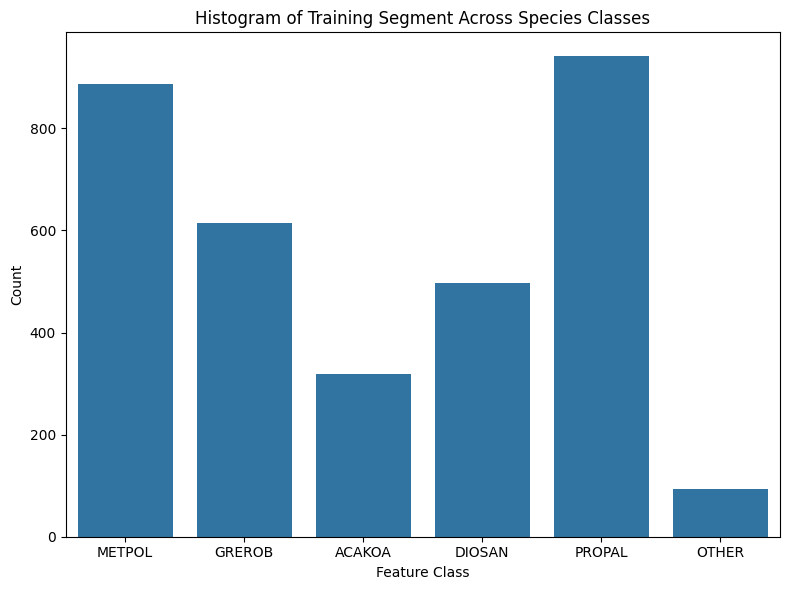

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a list of band labels by grouping statistics by each band
bands = ['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']
statistics = ['mean', 'variance', 'skewness', 'kurtosis']

plt.figure(figsize=(8, 6))

# Plot a histogram (countplot) of feature_class
sns.countplot(x='feature_class', data=training)

# Get current x-axis tick labels (which are feature class values)
current_labels = plt.gca().get_xticks()

# Map the current labels to the values in the dictionary
new_labels = [species_labels.get(int(label), label) for label in current_labels]

# Set the new x-axis labels
plt.gca().set_xticklabels(new_labels)

# Add title and labels
plt.title('Histogram of Training Segment Across Species Classes')
plt.xlabel('Feature Class')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

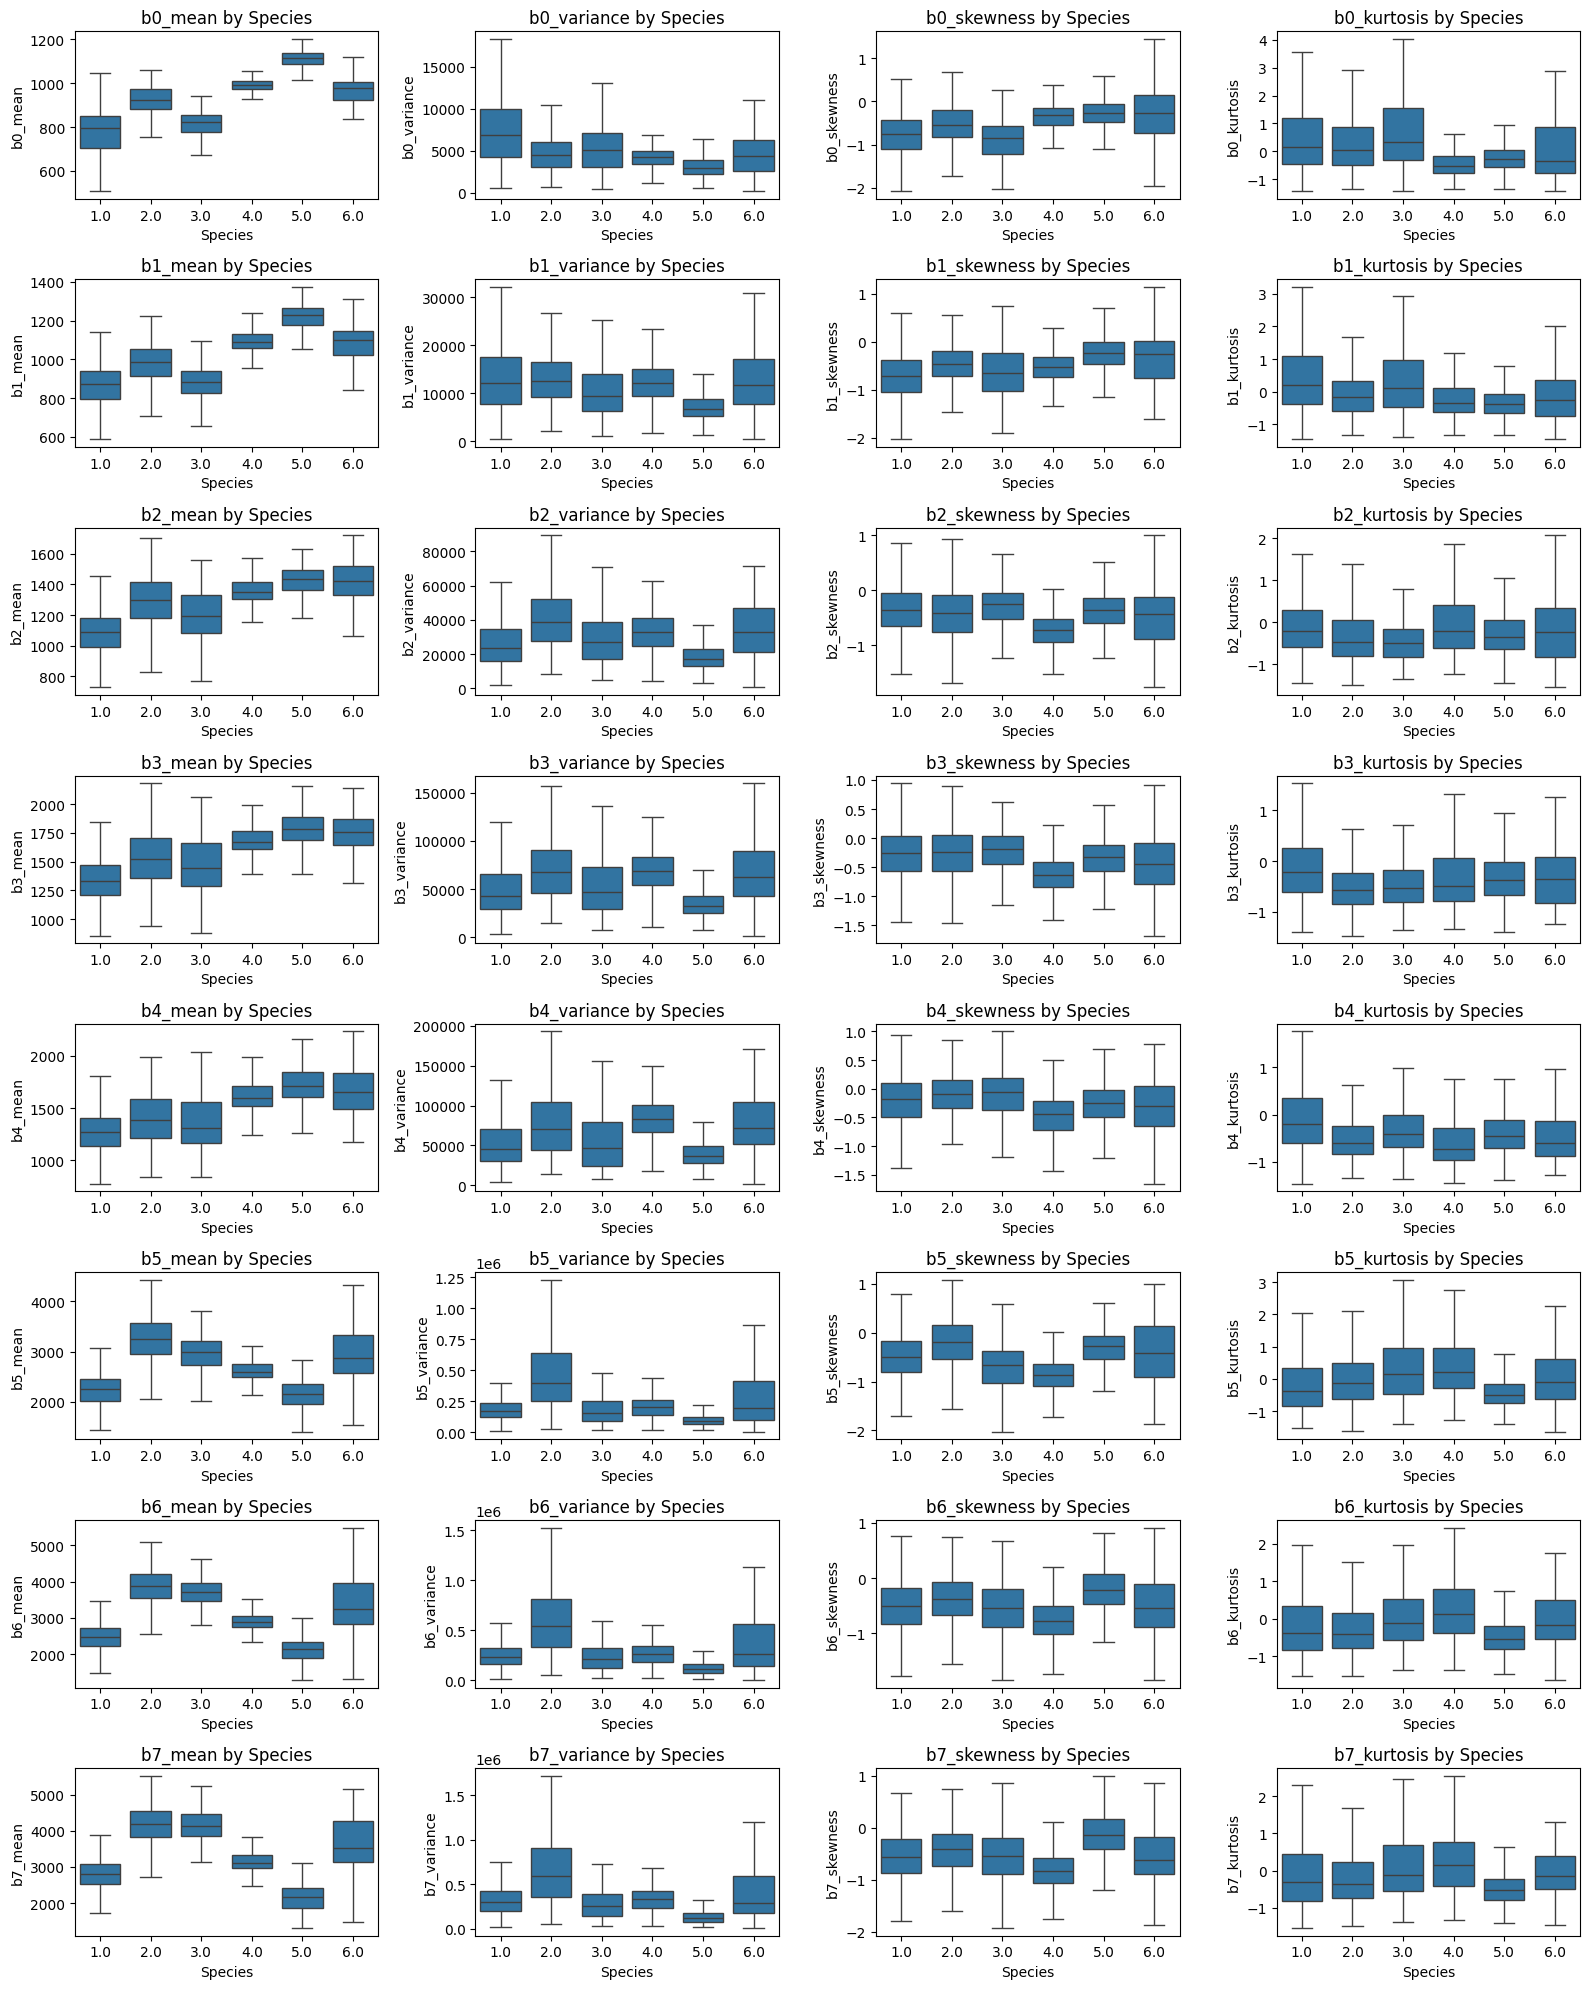

In [78]:
# Creating a list of band labels by grouping statistics by each band
bands = ['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']
statistics = ['mean', 'variance', 'skewness', 'kurtosis']
# contrast', 'b0_dissimilarity', 'b0_homogeneity', 'b0_ASM', 'b0_energy', 'b0_correlation

# Set up the plot with subplots for each band and statistic
fig, axes = plt.subplots(len(bands), len(statistics), figsize=(16, 20))

# Loop over bands and statistics to create a boxplot for each combination
for i, band in enumerate(bands):
    for j, stat in enumerate(statistics):
        column = f"{band}_{stat}"
        sns.boxplot(x='feature_class', y=column, data=training, ax=axes[i, j], showfliers=False)
        axes[i, j].set_title(f'{column} by Species')
        axes[i, j].set_xlabel('Species')
        axes[i, j].set_ylabel(column)

# Adjust the layout
plt.tight_layout()
plt.show()

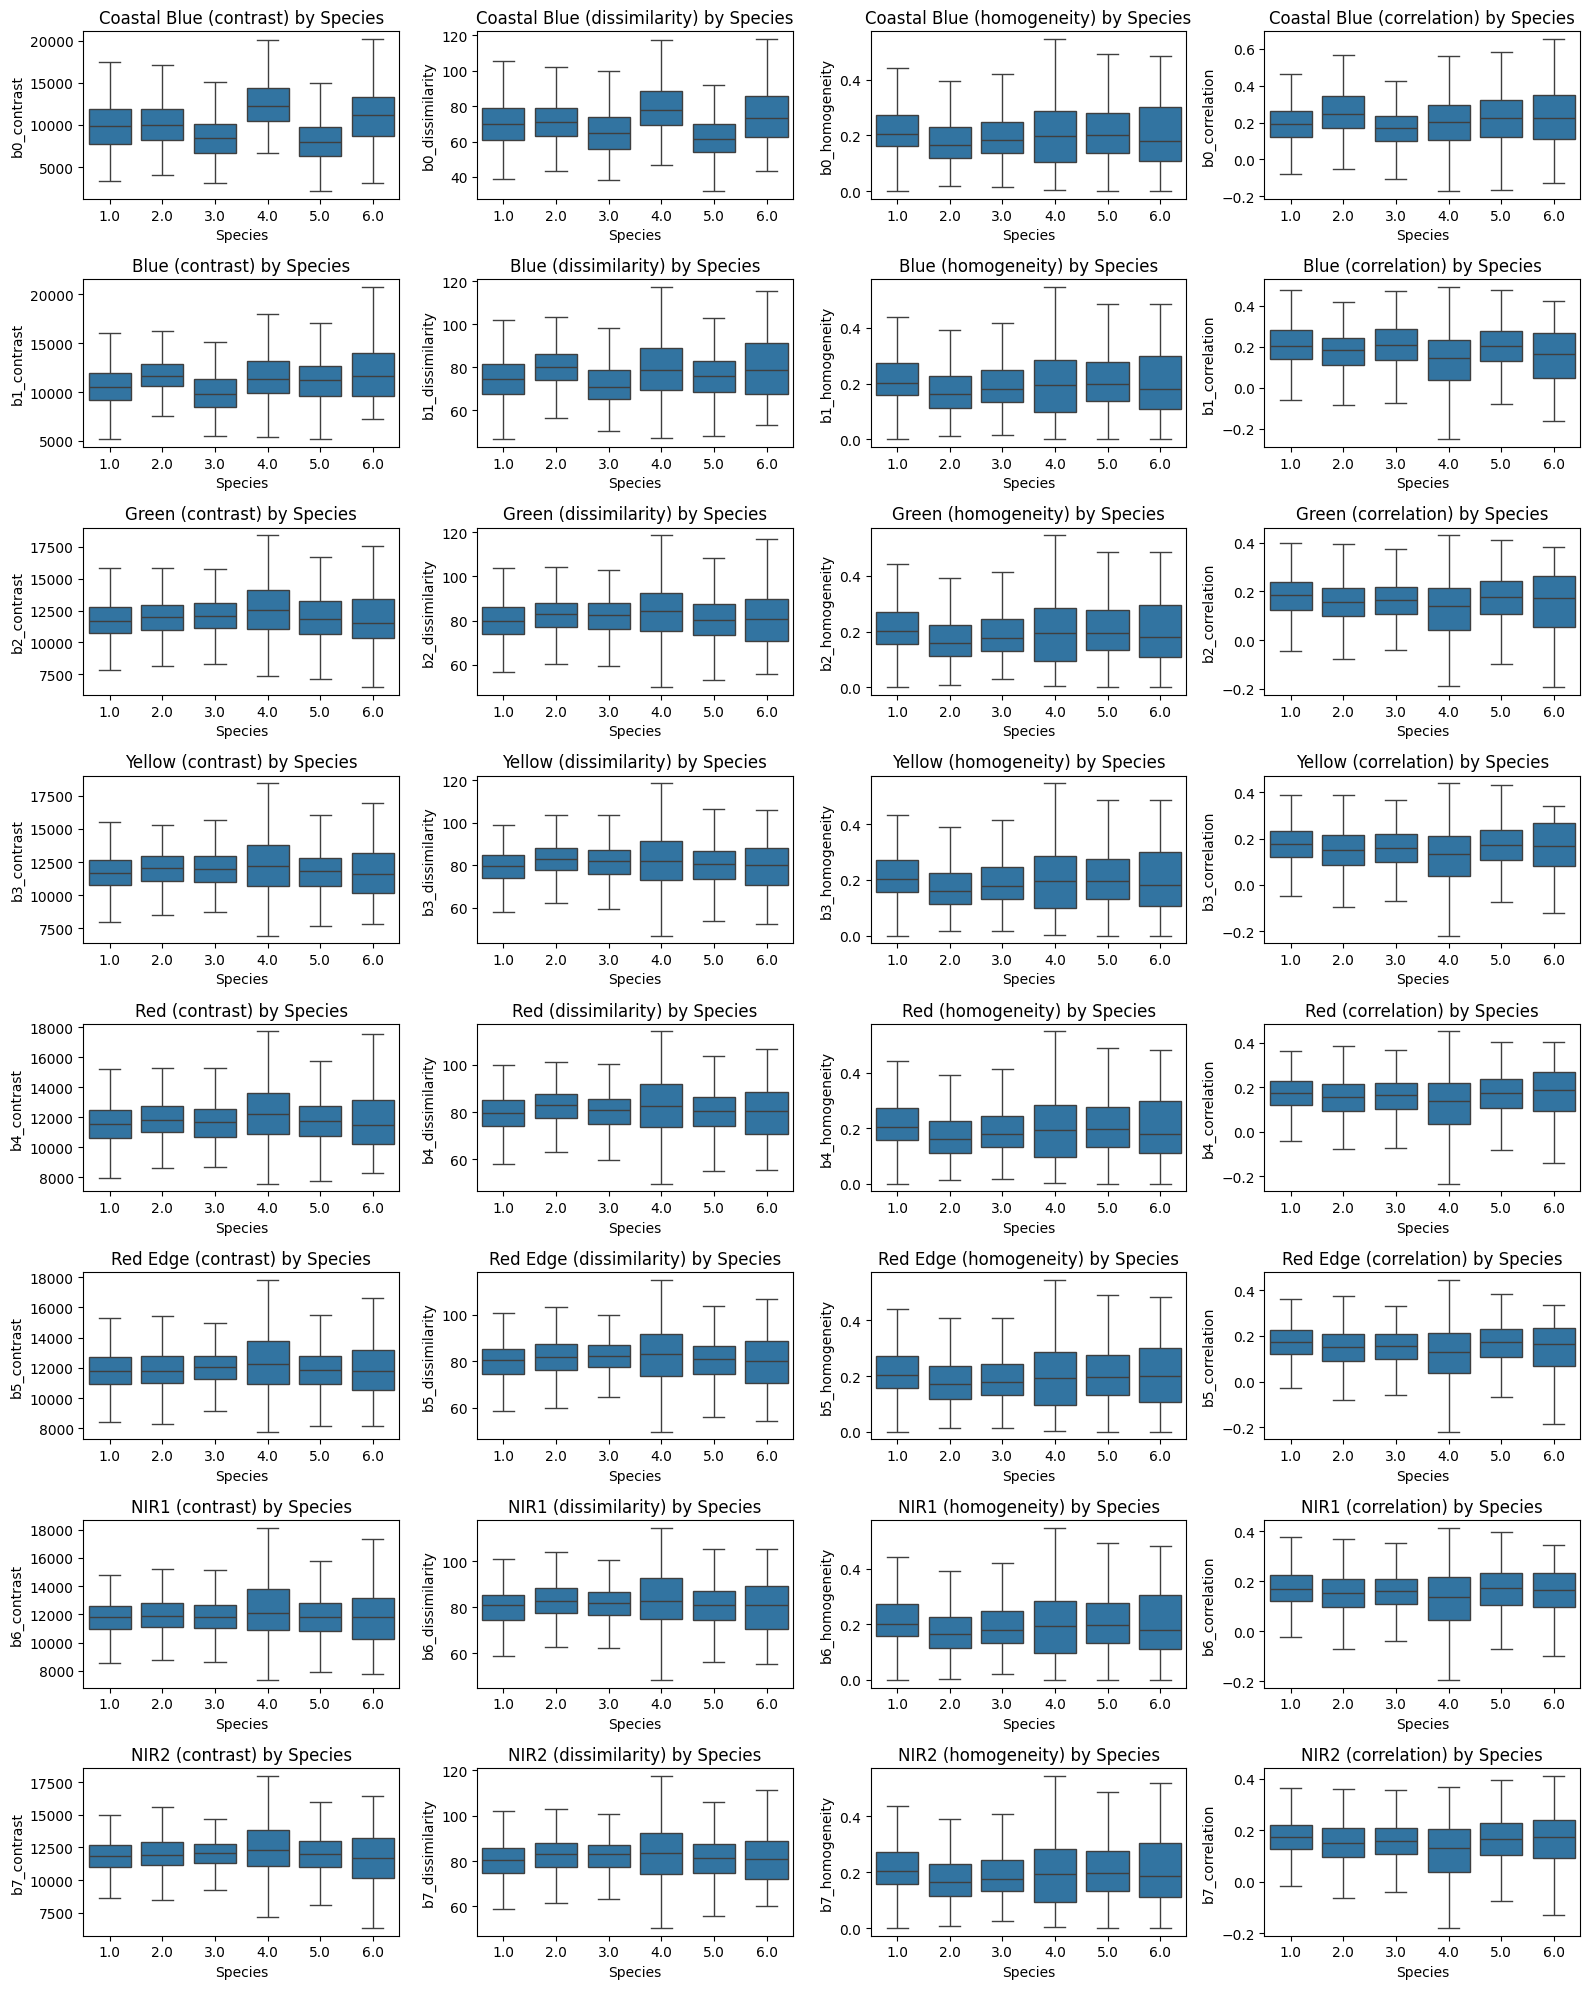

In [20]:
# Creating a list of band labels by grouping statistics by each band
bands = ['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']
statistics = ['contrast', 'dissimilarity', 'homogeneity', 'correlation']
# contrast', 'b0_dissimilarity', 'b0_homogeneity', 'b0_ASM', 'b0_energy', 'b0_correlation

# Set up the plot with subplots for each band and statistic
fig, axes = plt.subplots(len(bands), len(statistics), figsize=(16, 20))

# Loop over bands and statistics to create a boxplot for each combination
for i, band in enumerate(bands):
    for j, stat in enumerate(statistics):
        column = f"{band}_{stat}"
        sns.boxplot(x='feature_class', y=column, data=training, ax=axes[i, j], showfliers=False)
        axes[i, j].set_title(f'{band_labels_textural[column]} by Species')
        axes[i, j].set_xlabel('Species')
        axes[i, j].set_ylabel(column)

# Adjust the layout
plt.tight_layout()
plt.show()

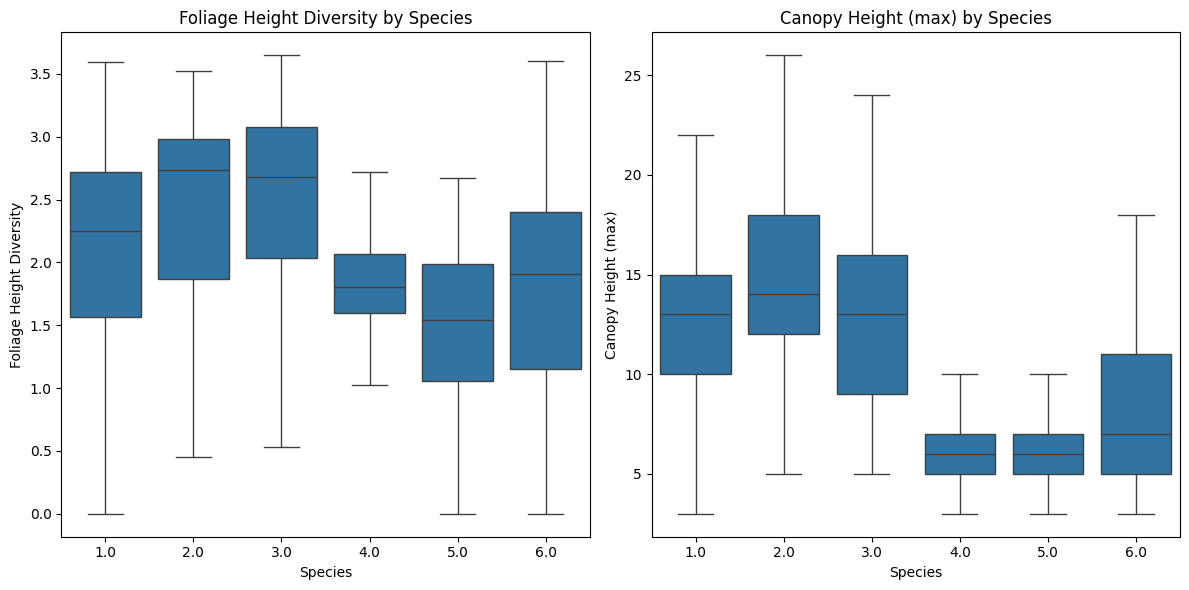

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot with subplots for the two structural characteristics
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for fhd (from training_structure)
sns.boxplot(x='feature_class', y='fhd', data=training_structure, ax=axes[0], showfliers=False)
axes[0].set_title(f'{band_labels_structural["fhd"]} by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Foliage Height Diversity')

# Plot for b8_max (from training)
sns.boxplot(x='feature_class', y='b8_max', data=training, ax=axes[1], showfliers=False)
axes[1].set_title(f'{band_labels_structural["b8_max"]} by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Canopy Height (max)')

# Adjust the layout
plt.tight_layout()
plt.show()

/var/folders/x8/dmkw_6b93lb8tf86sbr1xh400000gn/T/ipykernel_34582/202998053.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels([species_labels.get(int(label), label) for label in axes[0, i].get_xticks()])
/var/folders/x8/dmkw_6b93lb8tf86sbr1xh400000gn/T/ipykernel_34582/202998053.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels([species_labels.get(int(label), label) for label in axes[0, i].get_xticks()])
/var/folders/x8/dmkw_6b93lb8tf86sbr1xh400000gn/T/ipykernel_34582/202998053.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, i].set_xticklabels([species_labels.get(int(label), label) for label in axes[1, i].get_xticks()])
/var/folders/x8/dmkw_6b93lb8tf86sbr1xh400000gn/T/

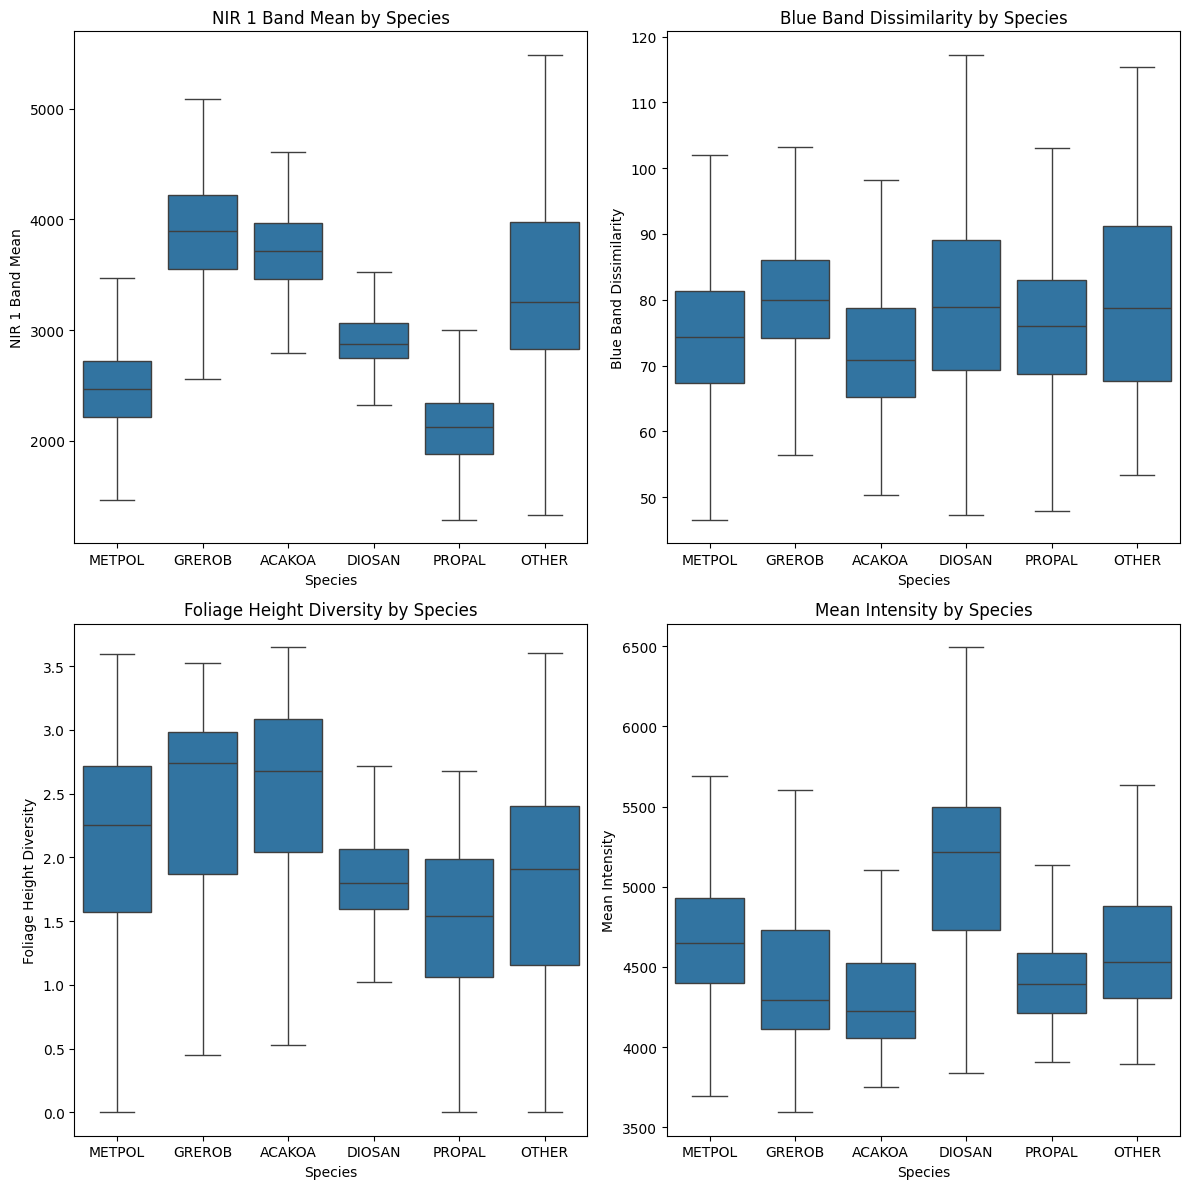

In [90]:

# List of features to plot from both DataFrames
features_training = ['b6_mean', 'b1_dissimilarity']
features_training_structure = ['fhd', 'mean_intensity']

# Titles for the plots
titles_training = ['NIR 1 Band Mean', 'Blue Band Dissimilarity']
titles_training_structure = ['Foliage Height Diversity', 'Mean Intensity']

# Set up the plot with subplots in a 2x2 grid (total of 4 plots)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the features from the 'training' DataFrame
for i, feature in enumerate(features_training):
    sns.boxplot(x='feature_class', y=feature, data=training, ax=axes[0, i], showfliers=False)
    axes[0, i].set_title(f'{titles_training[i]} by Species')
    axes[0, i].set_xlabel('Species')
    axes[0, i].set_ylabel(titles_training[i])
    # Update x-axis labels
    axes[0, i].set_xticklabels([species_labels.get(int(label), label) for label in axes[0, i].get_xticks()])

# Plot the features from the 'training_structure' DataFrame
for i, feature in enumerate(features_training_structure):
    sns.boxplot(x='feature_class', y=feature, data=training_structure, ax=axes[1, i], showfliers=False)
    axes[1, i].set_title(f'{titles_training_structure[i]} by Species')
    axes[1, i].set_xlabel('Species')
    axes[1, i].set_ylabel(titles_training_structure[i])
    # Update x-axis labels
    axes[1, i].set_xticklabels([species_labels.get(int(label), label) for label in axes[1, i].get_xticks()])

# Adjust the layout
plt.tight_layout()

# Save the figure to the specified location
plt.savefig('/Users/iosefa/Desktop/fig1.png')

# Show the plot
plt.show()

ValueError: Could not interpret value `fhd` for `y`. An entry with this name does not appear in `data`.

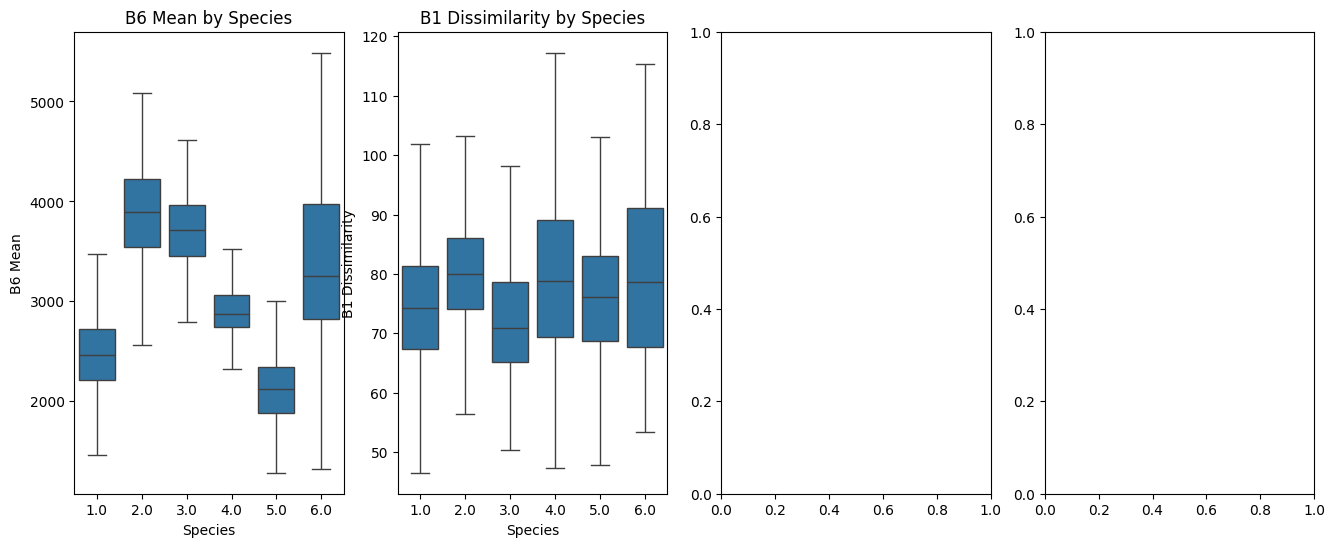

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features_to_plot = ['b6_mean', 'b1_dissimilarity', 'fhd', 'mean_intensity']
titles = ['B6 Mean', 'B1 Dissimilarity', 'Foliage Height Diversity', 'Mean Intensity']

# Set up the plot with subplots for each feature
fig, axes = plt.subplots(1, len(features_to_plot), figsize=(16, 6))

# Loop over the features to create a boxplot for each one
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='feature_class', y=feature, data=training, ax=axes[i], showfliers=False)
    axes[i].set_title(f'{titles[i]} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(titles[i])

# Adjust the layout
plt.tight_layout()
plt.show()

In [36]:
import geopandas as gpd
import pandas as pd

# Define input file paths and corresponding class values
files_classes = {
    '/Users/iosefa/silkoak_guess.gpkg': 2,
    '/Users/iosefa/kiawe_guess.gpkg': 5,
    '/Users/iosefa/diosand.gpkg': 4,
    '/Users/iosefa/koa.gpkg': 3,
    '/Users/iosefa/metpol.gpkg': 1
}

# Initialize an empty GeoDataFrame without setting the CRS
final_gdf = gpd.GeoDataFrame()

# Loop over each GeoPackage, adding the class value to the polygons
for file, class_value in files_classes.items():
    gdf = gpd.read_file(file)
    gdf['acceptable_classes'] = str(class_value)  # Add the class value as a string
    
    # If final_gdf is empty, assign gdf to it, else perform spatial union
    if final_gdf.empty:
        final_gdf = gdf
    else:
        # Perform union with final_gdf and aggregate the 'acceptable_classes'
        final_gdf = gpd.overlay(final_gdf, gdf, how='union')
        
        # Combine the 'acceptable_classes' columns, handling NaN values
        final_gdf['acceptable_classes'] = final_gdf[['acceptable_classes_1', 'acceptable_classes_2']].apply(
            lambda row: ','.join(filter(None, map(str, row.dropna()))), axis=1
        )
        
        # Drop unnecessary columns created by the union
        final_gdf = final_gdf.drop(columns=['acceptable_classes_1', 'acceptable_classes_2'])

# Add the class '6' to all geometries
final_gdf['acceptable_classes'] = final_gdf['acceptable_classes'].apply(lambda x: '6,' + x if '6' not in x else x)

# Write the result to a new GeoPackage
final_gdf.to_file('/Users/iosefa/combined_classes.gpkg', driver='GPKG')

print("GeoPackage created successfully.")

GeoPackage created successfully.


In [63]:
print(objects.shape)
ob = objects.dropna().reset_index(drop=True).copy()
print(ob.shape)

(489480, 101)
(379376, 101)


In [39]:
regions['acceptable_classes'] = regions['acceptable_classes'].apply(
    lambda x: [int(cls) for cls in x.split(',')]
)


In [41]:
ob.columns.values

array(['segment_id', 'b0_mean', 'b0_variance', 'b0_max', 'b0_skewness',
       'b0_kurtosis', 'b0_contrast', 'b0_dissimilarity', 'b0_homogeneity',
       'b0_ASM', 'b0_energy', 'b0_correlation', 'b1_mean', 'b1_variance',
       'b1_max', 'b1_skewness', 'b1_kurtosis', 'b1_contrast',
       'b1_dissimilarity', 'b1_homogeneity', 'b1_ASM', 'b1_energy',
       'b1_correlation', 'b2_mean', 'b2_variance', 'b2_max',
       'b2_skewness', 'b2_kurtosis', 'b2_contrast', 'b2_dissimilarity',
       'b2_homogeneity', 'b2_ASM', 'b2_energy', 'b2_correlation',
       'b3_mean', 'b3_variance', 'b3_max', 'b3_skewness', 'b3_kurtosis',
       'b3_contrast', 'b3_dissimilarity', 'b3_homogeneity', 'b3_ASM',
       'b3_energy', 'b3_correlation', 'b4_mean', 'b4_variance', 'b4_max',
       'b4_skewness', 'b4_kurtosis', 'b4_contrast', 'b4_dissimilarity',
       'b4_homogeneity', 'b4_ASM', 'b4_energy', 'b4_correlation',
       'b5_mean', 'b5_variance', 'b5_max', 'b5_skewness', 'b5_kurtosis',
       'b5_contrast', 

In [64]:
# Assuming `training` is your original DataFrame and it contains the specified columns

# List of columns for `tr`
columns_tr = [
    'segment_id', 'b0_mean', 'b4_variance', 'b5_mean', 'b5_skewness', 'b8_max',
    'b6_mean', 'b7_variance', 'b0_contrast', 'b1_dissimilarity', 'feature_class', 'geometry'
]

# Creating a copy of `training` for `tr` with only the specified columns
tr = training[columns_tr].copy()

# List of columns for `ob`
columns_ob = [
    'segment_id', 'b0_mean', 'b4_variance', 'b5_mean', 'b5_skewness', 'b8_max',
    'b6_mean', 'b7_variance', 'b0_contrast', 'b1_dissimilarity', 'geometry'
]

# Creating a copy of `training` for `ob` with only the specified columns
ob = ob[columns_ob]


In [44]:
ob.shape

(379376, 10)

In [45]:
classified = classify(ob, tr, acceptable_classes_gdf=regions,
             method='rf', test_size=0.4, compute_reports=True)

In [46]:
print(classified.report)

              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       191
         2.0       0.81      0.92      0.86       115
         3.0       0.93      0.82      0.87        61
         4.0       0.84      0.92      0.88       100
         5.0       0.98      0.99      0.99       179
         6.0       0.00      0.00      0.00        24

    accuracy                           0.90       670
   macro avg       0.75      0.77      0.76       670
weighted avg       0.87      0.90      0.89       670



In [47]:
classified.classified.to_file("/Users/iosefa/new_rf_2021.gpkg")

In [65]:
classified_mlp = classify(
    ob, tr, acceptable_classes_gdf=regions, test_size=0.4, compute_reports=True,
    method='mlp', compute_shap=True, hidden_layer_sizes=(100, 50, 30, ), 
    solver='lbfgs', max_iter=10000
)

Using 2010 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 2010/2010 [2:44:30<00:00,  4.91s/it]    


In [101]:
# import shap

# vars = tr.drop(['feature_class', 'geometry', 'segment_id'], axis=1, errors='ignore')
# shap_values = classified_mlp.shap_values
# mapped_feature_names = [labels.get(col, col) for col in vars.columns]
# class_names = [species_labels[class_ind] for class_ind in range(shap_values.shape[-1])]
# shap.summary_plot(
#     [shap_values[:, :, class_ind] for class_ind in range(shap_values.shape[-1])],
#     feature_names=mapped_feature_names,
#     class_names=class_names
# )
import shap
import matplotlib.pyplot as plt

# Generate SHAP summary plot within a matplotlib figure
vars = tr.drop(['feature_class', 'geometry', 'segment_id'], axis=1, errors='ignore')
shap_values = classified_mlp.shap_values
mapped_feature_names = [labels.get(col, col) for col in vars.columns]
class_names = [species_labels[class_ind] for class_ind in range(shap_values.shape[-1])]

# Create a figure explicitly
plt.figure(figsize=(10, 8))

# Generate SHAP summary plot
shap.summary_plot(
    [shap_values[:, :, class_ind] for class_ind in range(shap_values.shape[-1])],
    feature_names=mapped_feature_names,
    class_names=class_names,
    show=False  # Prevent the plot from showing immediately
)

# Save the plot
plt.savefig('/Users/iosefa/Desktop/shap_summary_plot.png', bbox_inches='tight')

# Optionally, clear the figure
plt.clf()

<Figure size 800x510 with 0 Axes>

In [58]:
# print(classified.report)
print(classified_mlp.report)

              precision    recall  f1-score   support

         1.0       0.89      0.92      0.90       343
         2.0       0.82      0.85      0.83       248
         3.0       0.86      0.86      0.86       121
         4.0       0.87      0.88      0.87       202
         5.0       0.99      0.99      0.99       374
         6.0       0.31      0.21      0.25        52

    accuracy                           0.89      1340
   macro avg       0.79      0.78      0.79      1340
weighted avg       0.88      0.89      0.88      1340



In [59]:
# classified.classified.to_file("/Users/iosefa/class_full_rf_2021.gpkg")
classified_mlp.classified.to_file("/Users/iosefa/new_mlp_2021_2.gpkg")

In [96]:
labels = {
    "b0_mean": "Coastal Blue (mean)",
    "b0_variance": "Coastal Blue (variance)",
    "b0_skewness": "Coastal Blue (skewness)",
    "b0_kurtosis": "Coastal Blue (kurtosis)",
    #
    "b1_mean": "Blue (mean)",
    "b1_variance": "Blue (variance)",
    "b1_skewness": "Blue (skewness)",
    "b1_kurtosis": "Blue (kurtosis)",
    #
    "b2_mean": "Green (mean)",
    "b2_variance": "Green (variance)",
    "b2_skewness": "Green (skewness)",
    "b2_kurtosis": "Green (kurtosis)",
    #
    "b3_mean": "Yellow (mean)",
    "b3_variance": "Yellow (variance)",
    "b3_skewness": "Yellow (skewness)",
    "b3_kurtosis": "Yellow (kurtosis)",
    #
    "b4_mean": "Red (mean)",
    "b4_variance": "Red (variance)",
    "b4_skewness": "Red (skewness)",
    "b4_kurtosis": "Red (kurtosis)",
    #
    "b5_mean": "Red Edge (mean)",
    "b5_variance": "Red (variance)",
    "b5_skewness": "Red (skewness)",
    "b5_kurtosis": "Red (kurtosis)",
    #
    "b6_mean": "NIR1 (mean)",
    "b6_variance": "NIR1 (variance)",
    "b6_skewness": "NIR1 (skewness)",
    "b6_kurtosis": "NIR1 (kurtosis)",
    #
    "b7_mean": "NIR2 (mean)",
    "b7_variance": "NIR2 (variance)",
    "b7_skewness": "NIR2 (skewness)",
    "b7_kurtosis": "NIR2 (kurtosis)",
    "b0_contrast": "Coastal Blue (contrast)",
    "b0_dissimilarity": "Coastal Blue (dissimilarity)",
    "b0_homogeneity": "Coastal Blue (homogeneity)",
    "b0_correlation": "Coastal Blue (correlation)",
    #
    "b1_contrast": "Blue (contrast)",
    "b1_dissimilarity": "Blue (dissimilarity)",
    "b1_homogeneity": "Blue (homogeneity)",
    "b1_correlation": "Blue (correlation)",
    #
    "b2_contrast": "Green (contrast)",
    "b2_dissimilarity": "Green (dissimilarity)",
    "b2_homogeneity": "Green (homogeneity)",
    "b2_correlation": "Green (correlation)",
    #
    "b3_contrast": "Yellow (contrast)",
    "b3_dissimilarity": "Yellow (dissimilarity)",
    "b3_homogeneity": "Yellow (homogeneity)",
    "b3_correlation": "Yellow (correlation)",
    #
    "b4_contrast": "Red (contrast)",
    "b4_dissimilarity": "Red (dissimilarity)",
    "b4_homogeneity": "Red (homogeneity)",
    "b4_correlation": "Red (correlation)",
    #
    "b5_contrast": "Red Edge (contrast)",
    "b5_dissimilarity": "Red Edge (dissimilarity)",
    "b5_homogeneity": "Red Edge (homogeneity)",
    "b5_correlation": "Red Edge (correlation)",
    #
    "b6_contrast": "NIR1 (contrast)",
    "b6_dissimilarity": "NIR1 (dissimilarity)",
    "b6_homogeneity": "NIR1 (homogeneity)",
    "b6_correlation": "NIR1 (correlation)",
    #
    "b7_contrast": "NIR2 (contrast)",
    "b7_dissimilarity": "NIR2 (dissimilarity)",
    "b7_homogeneity": "NIR2 (homogeneity)",
    "b7_correlation": "NIR2 (correlation)",
    "fhd": "Foliage Height Diversity",
    "b8_max": "Canopy Height (max)",
    "mean_intensity": "Intensity (mean)",
    "variance_intensity": "Intensity (variance)",
    "total_points": "Total Points",
}

species_labels = {
    0: "METPOL",
    1: "GREROB",
    2: "ACAKOA",
    3: "DIOSAN",
    4: "PROPAL",
    5: "OTHER",
}

In [107]:
import geopandas as gpd

df_combined = gpd.GeoDataFrame({
    'predicted_class': classified_mlp.classified['predicted_class'],
    'b8_max': ob['b8_max'],
    'geometry': ob['geometry']
})

if classified_mlp.classified.shape[0] != ob.shape[0]:
    print("DataFrames do not have the same number of rows.")

df_combined.to_file("/Users/iosefa/Desktop/species_heights.gpkg", layer='species_heights', driver="GPKG")

In [ ]:
# image = open_geotiff(image_path)
# mask, _ = open_binary_geotiff_as_mask(mask_path)

# pixel_area = 0.5 ** 2
# crown_area = math.pi * (6 ** 2)
# tree_area = mask.sum() * pixel_area
# n_crowns = round(tree_area / crown_area)
# print(n_crowns)

In [ ]:
# segmented_image = create_segments(
#     image,
#     mask=mask,
#     segmentation_bands=[1,4,5],
#     method="slic",
#     compactness=0.25,
#     sigma=0,
#     n_segments=n_crowns,
#     convert2lab=False,
#     slic_zero=True
# )

In [ ]:
# segmented_image = create_segments(
#     image,
#     mask=mask,
#     method="slic"
# )
# segmented_image.to_file('data/segments_full.gpkg')

In [ ]:
# create_tiled_segments('data/text_xyz.tif', 'data/test_xyz_mask.tif', 'data/tiles', tile_size=200, buffer=40)